# Year 1

## Importing modules

In [3]:
#standard libs
from math import sqrt
import random
import os

#default data science libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#modules for data preprocessing
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, KFold
from sklearn.model_selection import RandomizedSearchCV

#classification models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

#evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier




C:\Developement\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Developement\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Developement\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## loading data

In [4]:
data = pd.read_excel('data/1year.xlsx')
data['B'] = (data['B'].index > 6755).astype(int)

In [5]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,B
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


# Data preprocessing

In [6]:
def set_new_headers(df):
    cols = ['X' + str(i+1) for i in range(len(df.columns)-1)]
    cols.append('Y')
    df.columns = cols

imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
mean_imputed_df = pd.DataFrame(imputer.fit_transform(data))
set_new_headers(mean_imputed_df)

data_imp = pd.DataFrame()

X = mean_imputed_df.iloc[:, :-1]
Y = mean_imputed_df.iloc[:,-1]

In [7]:
mean_imputed_df.head(15)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.200550,0.379510,0.396410,2.0472,32.3510,0.388250,0.249760,1.33050,1.13890,0.50494,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.6580,4.4158,7.42770,0.0
1,0.209120,0.499880,0.472250,1.9447,14.7860,0.000000,0.258340,0.99601,1.69960,0.49788,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.3500,3.4000,60.98700,0.0
2,0.248660,0.695920,0.267130,1.5548,-1.1523,0.000000,0.309060,0.43695,1.30900,0.30408,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.2700,2.7185,5.20780,0.0
3,0.081483,0.307340,0.458790,2.4928,51.9520,0.149880,0.092704,1.86610,1.05710,0.57353,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.4350,4.2228,5.54970,0.0
4,0.187320,0.613230,0.229600,1.4063,-7.3128,0.187320,0.187320,0.63070,1.15590,0.38677,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.2100,2.8692,7.89800,0.0
5,0.228220,0.497940,0.359690,1.7502,-47.7170,0.000000,0.281390,1.00830,1.97860,0.50206,...,0.139320,0.454570,0.85891,0.023002,3.4028,8.9949,88.4440,4.1269,12.29900,0.0
6,0.111090,0.647440,0.289710,1.4705,2.5349,0.000000,0.111090,0.54454,1.73480,0.35256,...,0.605900,0.315100,0.40871,0.000000,6.3222,2.9098,129.5500,2.8173,18.35200,0.0
7,0.532320,0.027059,0.705540,53.9540,299.5800,0.000000,0.652400,35.95700,0.65273,0.97294,...,0.086730,0.547130,0.49521,0.013194,9.1300,82.0500,7.4503,48.9910,2.32170,0.0
8,0.009020,0.632020,0.053735,1.1263,-37.8420,0.000000,0.014434,0.58223,1.33320,0.36798,...,0.180110,0.024512,0.84165,0.340940,9.9665,4.2382,116.5000,3.1330,2.56030,0.0
9,0.124080,0.838370,0.142040,1.1694,-91.8830,0.000000,0.153280,0.19279,2.11560,0.16163,...,0.079665,0.767680,0.92847,0.000000,3.3192,6.4994,144.6300,2.5236,107.67000,0.0


In [8]:
#Using smote to balance data
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=10)
#smote = SMOTE(random_state=32)
#X_train_sm, y_train_sm= smote.fit_sample(X_train, y_train)

In [9]:
#cross validation
nfolds = 10
nclass = 2
ntrain = X_train.shape[0]
ntest = X_test.shape[0]


#kfold = KFold(n_splits=nfolds, random_state=20, shuffle=True)
cross_val = StratifiedKFold(nfolds)

# Creating model objects
## Tuning model hyperparameters

### Logistic regression

In [29]:
log_reg = LogisticRegression()

log_reg_params = {"C": [0.5, 0.55, 0.6],
                 "solver": ['newton-cg', 'sag', 'saga']}

lr_grid = GridSearchCV(log_reg, log_reg_params, cv=cross_val, refit=True, verbose=1, n_jobs=4)

lr_grid.fit(X_train, y_train)
lr_best_est = lr_grid.best_estimator_

print("Accuracy (LogisticRegression): {} with params {}".format(lr_grid.best_score_, lr_best_est))


Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   10.2s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:   16.6s finished


Accuracy (LogisticRegression): 0.9609597397315982 with params LogisticRegression(C=0.55, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


## Decision tree

In [30]:
d_tree = DecisionTreeClassifier()
d_tree_params = {'criterion': ['gini'],
                'max_depth': [50, 60, 70],
                'max_leaf_nodes': [100, 125, 150]}

dt_grid = GridSearchCV(d_tree, d_tree_params, cv=cross_val, refit=True, verbose=1, n_jobs=4)
dt_grid.fit(X_train, y_train)

dt_best_est = dt_grid.best_estimator_
print("Accuracy (Decision tree): {} with params {}".format(dt_grid.best_score_, dt_best_est))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:    6.0s finished


Accuracy (Decision tree): 0.9601464009760065 with params DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=70,
                       max_features=None, max_leaf_nodes=150,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


## Random forest

In [31]:
r_forest = RandomForestClassifier()
r_forest_params = {'n_estimators': [200, 250],
                'criterion': ['gini'],
                'max_depth': [25, 50],
                'max_features': [64],
                'max_leaf_nodes': [10, 25],
                'bootstrap': [True]}

#r_forest_grid = GridSearchCV(r_forest, r_forest_params, cv=cross_val, refit=True, verbose=1, n_jobs=4)
#r_forest_grid.fit(X_train_sm, y_train_sm)
rf_random_grid = RandomizedSearchCV(r_forest, r_forest_params, cv=cross_val, refit=True, verbose=1, n_jobs=-1)
rf_random_grid.fit(X_train, y_train)

rf_best_est = rf_random_grid.best_estimator_
print("Accuracy (Random forest): {} with params {}".format(rf_random_grid.best_score_, rf_best_est))

Fitting 10 folds for each of 8 candidates, totalling 80 fits


C:\Developement\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  6.8min finished


Accuracy (Random forest): 0.9774298495323303 with params RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features=64, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


## SVM

In [32]:
#
# SVM classifier в разработке
#


#svm = SVC()
#svm_params = {'kernel': ['linear', 'poly'],
#                'probability': [True],
#                'decision_function_shape': ['ovo']}

#svm_grid = GridSearchCV(svm, svm_params, cv=cross_val, refit=True, verbose=1, n_jobs=-1)
#svm_grid.fit(X_train_sm, y_train_sm)

#svm_grid = RandomizedSearchCV(svm, svm_params, cv=cross_val, refit=True, verbose=1, n_jobs=-1)
#svm_grid.fit(X_train_sm, y_train_sm)

#svm_best_est = svm_grid.best_estimator_
#print("Accuracy (SVM): {} with params {}".format(svm_grid.best_score_, svm_best_est))

## XGboost

In [33]:
xgboost = xgb.XGBClassifier()
xg_params = {
    'booster': ['gbtree', 'gblinear'],
    'eta': [0.3, 0,5],
    'objective': ['binary:logitraw', 'binary:hinge'],
    'gamma':[0,1],
    'max_depth': [8],
    'learning_rate': [0.01, 0.15, 0.20, 0.35]
}

#xgb_grid = GridSearchCV(xgboost, xg_params, cv=cross_val, refit=True, verbose=1, n_jobs=4)
#xgb_grid.fit(X_train_sm, y_train_sm)

xgb_grid = RandomizedSearchCV(xgboost, xg_params, cv=cross_val, refit=True, verbose=1, n_jobs=-1)
xgb_grid.fit(X_train, y_train)

xgb_best_est = xgb_grid.best_estimator_
print("Accuracy (XGboosting): {} with params {}".format(xgb_grid.best_score_, xgb_best_est))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.0min finished
C:\Developement\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Accuracy (XGboosting): 0.9800732004880033 with params XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0, gamma=1,
              learning_rate=0.15, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logitraw', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


# Second level

In [18]:
def show_feature_importance(model, features, model_name):
    plt.figure(figsize=(12,8))
    results=pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
    results=results.sort_values('importance', ascending=False)
    print(results.head(10))
    results.head(20).plot(x = 'feature', y = 'importance', kind = 'barh',
                     color = 'red', edgecolor = 'k', title = 'Feature Importances of ' + model_name)
    return results

In [19]:
ntrain=X_train.shape[0]
ntest = X_test.shape[0]
nclass = 2
SEED = 42
NFOLDS = 10
smote = SMOTE(random_state=32)

kf = KFold(n_splits=NFOLDS, random_state=SEED, shuffle=True)
labels = ['Normal','Bankruptcy']

In [20]:
def BuildModel(best_alg, X_train, y_train, X_test, kf, ntrain, ntest, nclass, NfOLDS):
    Xr_train = np.zeros((ntrain, nclass))
    Xr_test = np.zeros((ntest, nclass))
    tr_ind = np.arange(ntrain)
    print('tr_ind : ', tr_ind)
    accuracies = []
    
    for i, (train, test) in enumerate(kf.split(tr_ind)):
        clf = best_alg
        print(X_train.shape[0], y_train.shape[0])
        X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)
        
        #print(X_train_sm.shape[1], y_train_sm.shape[1])
        
        clf.fit(X_train_sm[train], y_train_sm[train])
        sc = clf.score(X_train_sm[test], y_train_sm[test])
        print(i, 'accuracy', sc)
        accuracies.append(sc)
        Xr_train[test] = clf.predict_proba(X_train_sm[test])
        Xr_test += clf.predict_proba(X_test)/NFOLDS
    
    print("Mean: {} ; Stdev: {}".format(np.mean(accuracies), np.std(accuracies)))
    
    return Xr_train, Xr_test


def BuildModel_Xgb(best_alg, X_train, y_train, X_test, kf, ntrain, ntest, nclass, NfOLDS):
    Xr_train = np.zeros((ntrain, nclass))
    Xr_test = np.zeros((ntest, nclass))
    tr_ind = np.arange(ntrain)
    accuracies = []
    
    for i, (train, test) in enumerate(kf.split(tr_ind)):
        clf = best_alg
        X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)
        clf.fit(X_train_sm[train], y_train_sm[train])
        sc = clf.score(X_train_sm[test], y_train_sm[test])
        print(i, 'accuracy', sc)
        accuracies.append(sc)
        Xr_train[test] = clf.predict_proba(X_train_sm[test])
        Xr_test += clf.predict_proba(X_test, validate_features=False)/NFOLDS
    
    print("Mean: {} ; Stdev: {}".format(np.mean(accuracies), np.std(accuracies)))
    
    return Xr_train, Xr_test

In [21]:
def show_accuracy(Xr, y, labels, best, nclass):
    pred=[]
    for x in Xr:
        if x > best:
            pred.append(1)
        else:
            pred.append(0)
    print(classification_report(y,pred, target_names=labels, digits=4))
    print(confusion_matrix(y, pred, labels=range(nclass)))

In [22]:
def show_auc(y_train_set, pred_train_set):
    thresholds = np.linspace(0.01, 0.5, 1000)
    f1_sc = np.array([f1_score(y_train_set, pred_train_set[:,1] > thr) for thr in thresholds])
    plt.figure(figsize=(12,8))
    plt.plot(thresholds, f1_sc, linewidth=4)
    plt.ylabel("F1 score", fontsize=18)
    plt.xlabel("Threshold", fontsize=18)
    
    best_model_f1 = thresholds[f1_sc.argmax()]
    
    return best_model_f1

## Logistic regression

In [39]:
lr_best = LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
pred_train, pred_test=BuildModel(lr_best, X_train, y_train, X_test,kf, ntrain, ntest, nclass, NFOLDS)

tr_ind :  [   0    1    2 ... 4915 4916 4917]
4918 4918


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


0 accuracy 0.9491869918699187
4918 4918


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


1 accuracy 0.9654471544715447
4918 4918


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


2 accuracy 0.9573170731707317
4918 4918


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


3 accuracy 0.9410569105691057
4918 4918


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


4 accuracy 0.959349593495935
4918 4918


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


5 accuracy 0.9573170731707317
4918 4918


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


6 accuracy 0.975609756097561
4918 4918


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


7 accuracy 0.9654471544715447
4918 4918


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


8 accuracy 0.9592668024439919
4918 4918
9 accuracy 0.9775967413441955
Mean: 0.9607595251105259 ; Stdev: 0.010478561795998294


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


0.152954808806489
0.06444444444444444


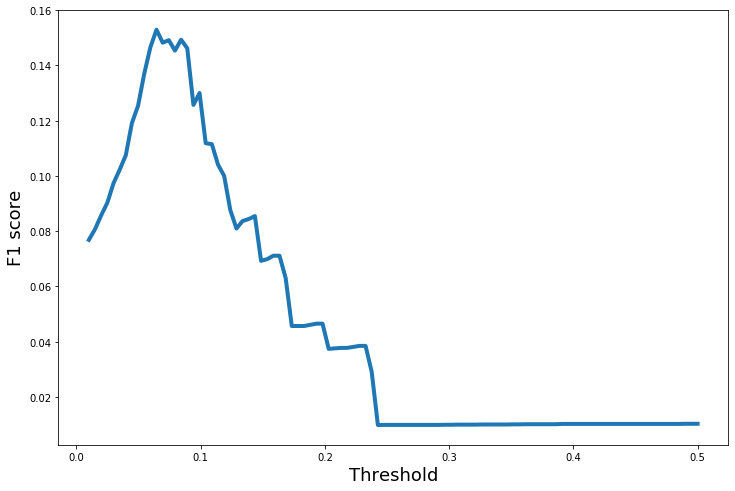

In [40]:
thresholds = np.linspace(0.01, 0.5, 100)
f1_sc = np.array([f1_score(y_train,pred_train[:,1] > thr) for thr in thresholds])
plt.figure(figsize=(12,8))
plt.plot(thresholds, f1_sc, linewidth=4 )
plt.ylabel("F1 score", fontsize=18)
plt.xlabel("Threshold", fontsize=18)
best_lr = thresholds[f1_sc.argmax()]
print(f1_sc.max())
print(best_lr)

In [41]:
show_accuracy(pred_train[:,1],y_train, labels, best_lr, nclass)

              precision    recall  f1-score   support

      Normal     0.9724    0.8703    0.9185      4735
  Bankruptcy     0.0971    0.3607    0.1530       183

    accuracy                         0.8514      4918
   macro avg     0.5347    0.6155    0.5357      4918
weighted avg     0.9398    0.8514    0.8900      4918

[[4121  614]
 [ 117   66]]


## Decision tree

In [42]:
dt_best = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
                       max_features=None, max_leaf_nodes=150,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
pred_train_dt, pred_test_dt=BuildModel(dt_best, X_train, y_train, X_test,kf, ntrain, ntest, nclass, NFOLDS)

tr_ind :  [   0    1    2 ... 4915 4916 4917]
4918 4918
0 accuracy 0.959349593495935
4918 4918
1 accuracy 0.9512195121951219
4918 4918
2 accuracy 0.9613821138211383
4918 4918
3 accuracy 0.967479674796748
4918 4918
4 accuracy 0.9735772357723578
4918 4918
5 accuracy 0.9613821138211383
4918 4918
6 accuracy 0.9654471544715447
4918 4918
7 accuracy 0.9552845528455285
4918 4918
8 accuracy 0.9674134419551935
4918 4918
9 accuracy 0.955193482688391
Mean: 0.9617728875863097 ; Stdev: 0.006482011248686618


0.5129533678756477
0.01


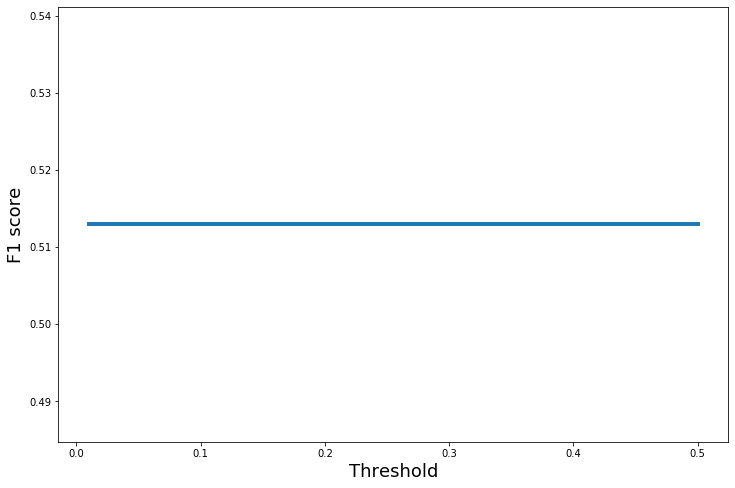

In [43]:
thresholds = np.linspace(0.01, 0.5, 100)
f1_sc_dt = np.array([f1_score(y_train,pred_train_dt[:,1] > thr) for thr in thresholds])
plt.figure(figsize=(12,8))
plt.plot(thresholds, f1_sc_dt, linewidth=4 )
plt.ylabel("F1 score", fontsize=18)
plt.xlabel("Threshold", fontsize=18)
best_dt_f1 = thresholds[f1_sc_dt.argmax()]
print(f1_sc_dt.max())
print(best_dt_f1)

In [44]:
show_accuracy(pred_train_dt[:,1],y_train, labels, best_dt_f1, nclass)

              precision    recall  f1-score   support

      Normal     0.9822    0.9780    0.9801      4735
  Bankruptcy     0.4877    0.5410    0.5130       183

    accuracy                         0.9618      4918
   macro avg     0.7349    0.7595    0.7465      4918
weighted avg     0.9638    0.9618    0.9627      4918

[[4631  104]
 [  84   99]]


   feature  importance
33     X34    0.224033
26     X27    0.116592
10     X11    0.085693
55     X56    0.059566
45     X46    0.045219
43     X44    0.036351
4       X5    0.035344
28     X29    0.031312
39     X40    0.028284
57     X58    0.024567


,feature,importance
33,X34,0.224033
26,X27,0.116592
10,X11,0.085693
55,X56,0.059566
45,X46,0.045219
...,...,...
36,X37,0.000000
22,X23,0.000000
49,X50,0.000000
30,X31,0.000000


<Figure size 864x576 with 0 Axes>

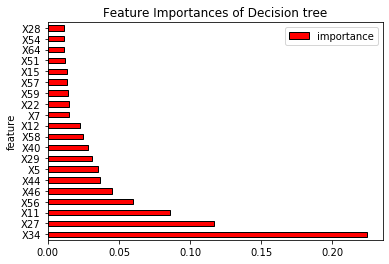

In [45]:
show_feature_importance(dt_best, data.columns[:-1], 'Decision tree')

## Random forest

In [46]:
rf_best = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features=64, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

pred_train_rf, pred_test_rf = BuildModel(rf_best, X_train, y_train, X_test,kf, ntrain, ntest, nclass, NFOLDS)

tr_ind :  [   0    1    2 ... 4915 4916 4917]
4918 4918
0 accuracy 0.967479674796748
4918 4918
1 accuracy 0.9735772357723578
4918 4918
2 accuracy 0.9695121951219512
4918 4918
3 accuracy 0.9735772357723578
4918 4918
4 accuracy 0.983739837398374
4918 4918
5 accuracy 0.9796747967479674
4918 4918
6 accuracy 0.983739837398374
4918 4918
7 accuracy 0.9796747967479674
4918 4918
8 accuracy 0.9775967413441955
4918 4918
9 accuracy 0.9816700610997964
Mean: 0.9770242412200089 ; Stdev: 0.005453934634028955


f1 score of random forest:  0.6344827586206897
0.3317171717171717


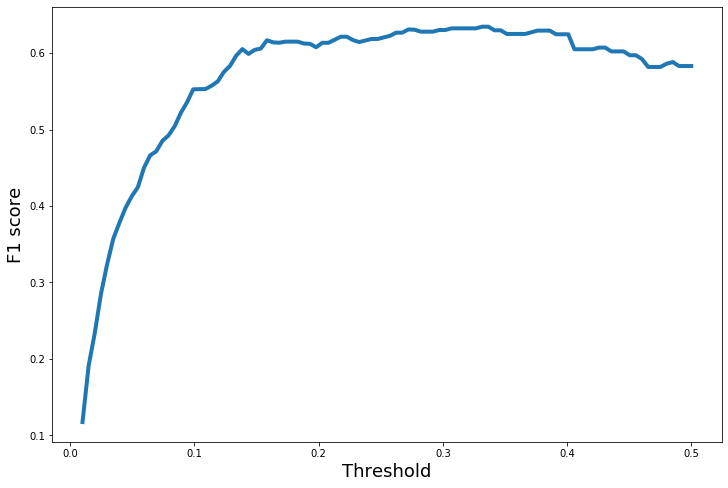

In [47]:
thresholds = np.linspace(0.01, 0.5, 100)
f1_sc_rf = np.array([f1_score(y_train,pred_train_rf[:,1] > thr) for thr in thresholds])
plt.figure(figsize=(12,8))
plt.plot(thresholds, f1_sc_rf, linewidth=4 )
plt.ylabel("F1 score", fontsize=18)
plt.xlabel("Threshold", fontsize=18)
best_rf_f1 = thresholds[f1_sc_rf.argmax()]
print('f1 score of random forest: ', f1_sc_rf.max())
print(best_rf_f1)

In [48]:
show_accuracy(pred_train_rf[:,1],y_train, labels, best_rf_f1, nclass)

              precision    recall  f1-score   support

      Normal     0.9811    0.9968    0.9889      4735
  Bankruptcy     0.8598    0.5027    0.6345       183

    accuracy                         0.9784      4918
   macro avg     0.9204    0.7498    0.8117      4918
weighted avg     0.9766    0.9784    0.9757      4918

[[4720   15]
 [  91   92]]


   feature  importance
33     X34    0.191723
8       X9    0.162390
26     X27    0.159452
10     X11    0.070565
57     X58    0.032793
55     X56    0.032686
28     X29    0.031982
45     X46    0.026581
43     X44    0.018299
60     X61    0.016334


,feature,importance
33,X34,0.191723
8,X9,0.162390
26,X27,0.159452
10,X11,0.070565
57,X58,0.032793
...,...,...
61,X62,0.001767
31,X32,0.001712
1,X2,0.001365
17,X18,0.001338


<Figure size 864x576 with 0 Axes>

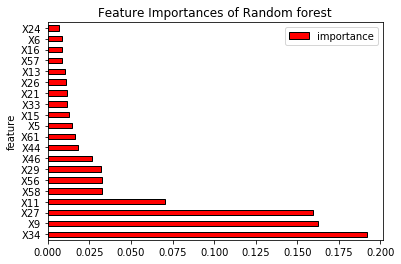

In [49]:
show_feature_importance(rf_best, data.columns[:-1], 'Random forest')

## Xgboost

In [56]:
xgb_best = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0,
              learning_rate=0.35, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logitraw', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

pred_train_xgb, pred_test_xgb = BuildModel_Xgb(xgb_best, X_train, y_train, X_test, kf, ntrain, ntest, nclass, NFOLDS)

0 accuracy 0.975609756097561
1 accuracy 0.9735772357723578
2 accuracy 0.9715447154471545
3 accuracy 0.975609756097561
4 accuracy 0.983739837398374
5 accuracy 0.9796747967479674
6 accuracy 0.9878048780487805
7 accuracy 0.983739837398374
8 accuracy 0.9796334012219959
9 accuracy 0.9837067209775967
Mean: 0.9794640935207723 ; Stdev: 0.005012874263417183


0.6480836236933798


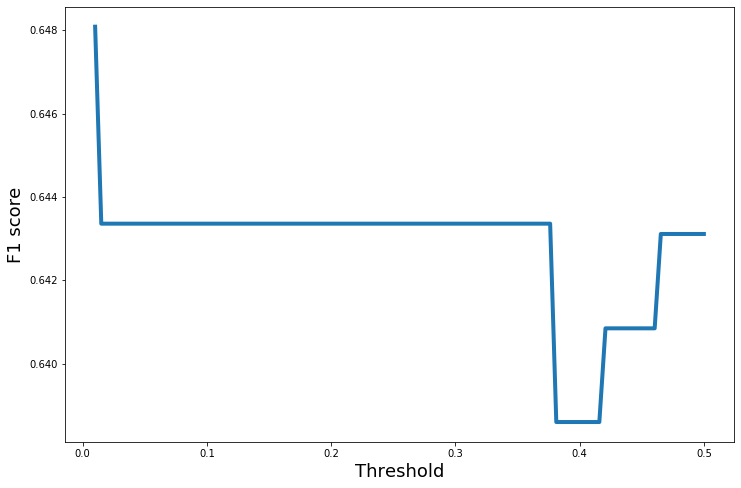

In [57]:
thresholds = np.linspace(0.01, 0.5, 100)
f1_sc_xgb = np.array([f1_score(y_train,pred_train_xgb[:,1] > thr) for thr in thresholds])
plt.figure(figsize=(12,8))
plt.plot(thresholds, f1_sc_xgb, linewidth=4 )
plt.ylabel("F1 score", fontsize=18)
plt.xlabel("Threshold", fontsize=18)
best_thr_xgb = thresholds[f1_sc_xgb.argmax()]
print(f1_sc_xgb.max())

In [58]:
show_accuracy(pred_train_xgb[:,1],y_train, labels, best_thr_xgb, nclass)

              precision    recall  f1-score   support

      Normal     0.9813    0.9977    0.9894      4735
  Bankruptcy     0.8942    0.5082    0.6481       183

    accuracy                         0.9795      4918
   macro avg     0.9378    0.7529    0.8188      4918
weighted avg     0.9781    0.9795    0.9767      4918

[[4724   11]
 [  90   93]]


   feature  importance
33     X34    0.074691
55     X56    0.056219
10     X11    0.050108
8       X9    0.035598
26     X27    0.034814
11     X12    0.031453
15     X16    0.027753
12     X13    0.025560
6       X7    0.025321
43     X44    0.022906


,feature,importance
33,X34,0.074691
55,X56,0.056219
10,X11,0.050108
8,X9,0.035598
26,X27,0.034814
...,...,...
16,X17,0.000000
13,X14,0.000000
17,X18,0.000000
59,X60,0.000000


<Figure size 864x576 with 0 Axes>

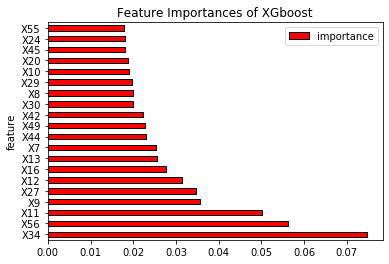

In [59]:
show_feature_importance(xgb_best, data.columns[:-1], 'XGboost')

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [10]:
lda = LDA()

lda.fit(X_train, y_train)

C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [12]:
prediction = lda.predict(X_test)

In [13]:
score = lda.score(X_test, y_test)

In [14]:
print(score)

0.9577999051683262


In [24]:
pred_train_lda, pred_test_lda = BuildModel(lda, X_train, y_train, X_test,kf, ntrain, ntest, nclass, NFOLDS)

tr_ind :  [   0    1    2 ... 4915 4916 4917]
4918 4918
0 accuracy 0.9552845528455285
4918 4918
1 accuracy 0.9735772357723578
4918 4918


C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


2 accuracy 0.9552845528455285
4918 4918
3 accuracy 0.9471544715447154
4918 4918
4 accuracy 0.959349593495935
4918 4918


C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


5 accuracy 0.9512195121951219
4918 4918
6 accuracy 0.9715447154471545
4918 4918
7 accuracy 0.9654471544715447
4918 4918


C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


8 accuracy 0.9653767820773931
4918 4918
9 accuracy 0.9755600814663951
Mean: 0.9619798652161673 ; Stdev: 0.009306551539418093


C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.24096385542168675


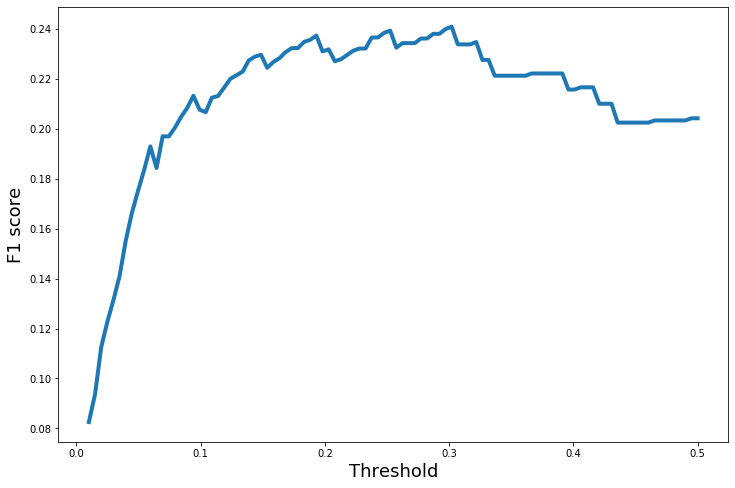

In [28]:
thresholds = np.linspace(0.01, 0.5, 100)
f1_sc_lda = np.array([f1_score(y_train,pred_train_lda[:,1] > thr) for thr in thresholds])
plt.figure(figsize=(12,8))
plt.plot(thresholds, f1_sc_lda, linewidth=4 )
plt.ylabel("F1 score", fontsize=18)
plt.xlabel("Threshold", fontsize=18)
best_thr_lda = thresholds[f1_sc_lda.argmax()]
print(f1_sc_lda.max())

In [30]:
show_accuracy(pred_train_lda[:,1],y_train, labels, best_thr_lda, nclass)

              precision    recall  f1-score   support

      Normal     0.9685    0.9924    0.9803      4735
  Bankruptcy     0.4545    0.1639    0.2410       183

    accuracy                         0.9616      4918
   macro avg     0.7115    0.5782    0.6106      4918
weighted avg     0.9493    0.9616    0.9528      4918

[[4699   36]
 [ 153   30]]
